# Notebook: Heapsort
## Author: Lincoln Steber
## Course: CS 2500 (Algorithms) @ Missouri S&T

### Prerequisite Packages

We will be using numpy, matplotlib library in this jupyter notebook.

In [1]:
# Install all the prerequisite packages from the Terminal
%pip install numpy
%pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

## Heap Sort with print statements

In [3]:
def max_heapify_print(A, i, heap_size):
    l = 2 * i + 1
    r = 2 * i + 2
    if l < heap_size and A[l] > A[i]:
        largest = l
    else:
        largest = i
    if r < heap_size and A[r] > A[largest]:
        largest = r
    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        print(f"Swaped: A[%2d]: %2d | A[%2d]: %2d  ||  Array: {A}" % (i, A[i], largest, A[largest]))
        max_heapify_print(A, largest, heap_size)

In [4]:
def build_max_heap_print(A):
    heap_size = len(A)
    for i in range(len(A) // 2, -1, -1):
        max_heapify_print(A, i, heap_size)

In [5]:
def heap_sort_print(A):
    build_max_heap_print(A)
    heap_size = len(A)
    for i in range(len(A) - 1, 0, -1):  
        A[0], A[i] = A[i], A[0]
        print(f"Swaped: A[ 0]: %2d | A[%2d]: %2d  ||  Array: {A}" % (A[0], i, A[i]))
        heap_size-= 1
        max_heapify_print(A, 0, heap_size)
    return A

## Check that the array is sorted correctly

In [6]:
def is_sorted(array):
    len_array = len(array)
    status = True
    i = 0
    while (i<len_array-1):
        if (array[i]>array[i+1]):
            status = False
        i = i + 1
    if (not status):
        print("Array is not sorted \n")
    else:
        print("Array is sorted \n")

## Test input for heap_sort_print and is_sorted functions

In [7]:
array =  [2, 6, 4, 3, 1, 5]

print(f"Input : {array}")
is_sorted(array)

array_out = heap_sort_print(array)

print(f"\nOutput : {array}")
is_sorted(array_out)

Input : [2, 6, 4, 3, 1, 5]
Array is not sorted 

Swaped: A[ 2]:  5 | A[ 5]:  4  ||  Array: [2, 6, 5, 3, 1, 4]
Swaped: A[ 0]:  6 | A[ 1]:  2  ||  Array: [6, 2, 5, 3, 1, 4]
Swaped: A[ 1]:  3 | A[ 3]:  2  ||  Array: [6, 3, 5, 2, 1, 4]
Swaped: A[ 0]:  4 | A[ 5]:  6  ||  Array: [4, 3, 5, 2, 1, 6]
Swaped: A[ 0]:  5 | A[ 2]:  4  ||  Array: [5, 3, 4, 2, 1, 6]
Swaped: A[ 0]:  1 | A[ 4]:  5  ||  Array: [1, 3, 4, 2, 5, 6]
Swaped: A[ 0]:  4 | A[ 2]:  1  ||  Array: [4, 3, 1, 2, 5, 6]
Swaped: A[ 0]:  2 | A[ 3]:  4  ||  Array: [2, 3, 1, 4, 5, 6]
Swaped: A[ 0]:  3 | A[ 1]:  2  ||  Array: [3, 2, 1, 4, 5, 6]
Swaped: A[ 0]:  1 | A[ 2]:  3  ||  Array: [1, 2, 3, 4, 5, 6]
Swaped: A[ 0]:  2 | A[ 1]:  1  ||  Array: [2, 1, 3, 4, 5, 6]
Swaped: A[ 0]:  1 | A[ 1]:  2  ||  Array: [1, 2, 3, 4, 5, 6]

Output : [1, 2, 3, 4, 5, 6]
Array is sorted 



## Plotting Run-Time Complexity

In [8]:
def max_heapify(A, i, heap_size):
    l = 2 * i + 1
    r = 2 * i + 2
    if l < heap_size and A[l] > A[i]:
        largest = l
    else:
        largest = i
    if r < heap_size and A[r] > A[largest]:
        largest = r
    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        max_heapify(A, largest, heap_size)

In [9]:
def build_max_heap(A):
    heap_size = len(A)
    for i in range(len(A) // 2, -1, -1):
        max_heapify(A, i, heap_size)

In [10]:
def heap_sort(A):
    build_max_heap(A)
    heap_size = len(A)
    for i in range(len(A) - 1, 0, -1):
        A[0], A[i] = A[i], A[0]
        heap_size-= 1
        max_heapify(A, 0, heap_size)

In [11]:
# Generate a random array of given size.
def generate_random_input(size):
    arr = np.random.randint(0, 20000, size = size)
    return arr

In [12]:
# Number of random arrays generated in this experiment
monte_carlo_runs = 500

# Range of array sizes considered
start_array = 10
end_array = 200
increments = 10

# Initiate average and worst case run-time
avg_time_taken = [0]*(end_array//increments)
worst_time_taken = [0]*(end_array//increments)

# Run-time experiments for random arrays of a given size
count = 0
for curr_array_size in range(start_array, end_array+1, increments):  
    run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        array = generate_random_input(curr_array_size)    # Generate random array
        start = time.time()                               # Record state time
        heap_sort(array)
        end = time.time()                                 # Record end time
        run_times.append(end - start)                     # Instantaneous ruun-time for a specific random input         

    avg_time_taken[count] = sum(run_times)/len(run_times) # Empirical average of run-time
    worst_time_taken[count] = max(run_times)              # Worst case run time across various random experiments
    count += 1
#print(time_taken)

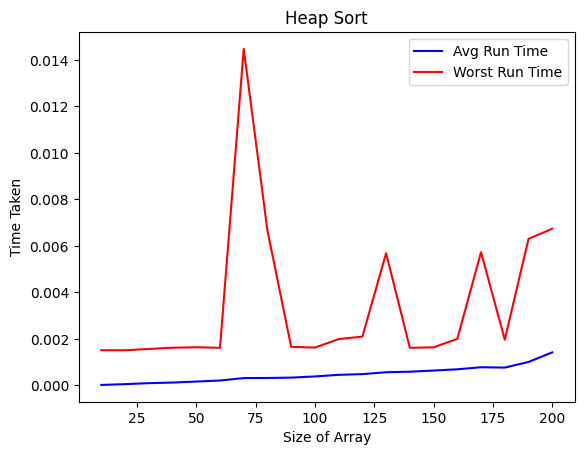

In [13]:
# Data Coordinates
x = np.arange(start_array, end_array+1, increments)
y = np.array(avg_time_taken)
z = np.array(worst_time_taken)

# Plot
plt.plot(x,y,'b',label='Avg Run Time') 
plt.plot(x,z,'r',label='Worst Run Time') 

# Add Title
plt.title("Heap Sort")

# Add Axes Labels
plt.xlabel("Size of Array") 
plt.ylabel("Time Taken") 

# Display
plt.legend()
plt.show()

### References
1. [Big o cheat sheet](https://www.bigocheatsheet.com/)
2. [Timeit example](https://www.geeksforgeeks.org/timeit-python-examples/)